# Project Assignment A

The first part of the final project is an 1 minute movie, which should explain the central idea/concept that you will investigate in your final project. You're making the movie so that the TAs and I can give you feedback, and so that other groups can steal your ideas (and you can steal ideas from them). The movie must contain the following

* An explanation of the central idea behind your final project, e.g. think about questions such as
    * What is the idea?
    Investigate if the bike infrastructure is sufficentent for supporting environmental transition and if there is ennough bikestands for the daily coumuters of copenhagen.
    * Which datasets do you need to explore the idea?
    Bydele: https://www.opendata.dk/city-of-copenhagen/bydele
    Cykelstativer placering: https://www.opendata.dk/city-of-copenhagen/cykelstativer?fbclid=IwAR0fmucqA3U4qdmu5B_kHfE_-gjd6phLZcfY12ZRtKv0dCYXevb_pr_Ff-Y_aem_AUEkMyBU2EZl4fTpAawJlwEMtZULAwYDxUS7hG_zYvh2ExF5jef_q1SofsuOA7rO8BAfHbbtRgKVLwaTtsjFu_Y8
    * Why is it interesting?
    Its interesting to se if the bikestands is distributed thoughout the city in a thoughtfull manner to, to make then avaiable for all citizants.
* A mock up of the visualization that you wish to build. (Anything is fine here. Pen and paper, MS Paint, Inkscape, D3, Midjourney (or any other LLM), anything is OK).
* Make sure you answer the questions
    * What genre is it? (for Genres, see section 4.3 of the Segel and Heer paper)
    * Why is that genre right for telling the story you want to communicate with the data
* A walk-through of your preliminary data-analysis, addressing
    * What is the total size of your data? (MB, number of rows, number of variables, etc) 25 columns: different categories, 6186 rows: different bike stands --> 6142 rows without the bike stands with no spots. Some datapoints are filteret out as they included non valid values.The total size of the data is 1.2+ MB, which do not include the geographical data (geojson).
    * What are other properties? (What is the date range? Is is it geo-data?, then a quick plot of locations, etc.)
    * Show the fundamental distributions of the data (similar to the work we did on SF crime data)
But other than that, there are no constraints. And we do appreciate funny/inventive/beautiful movies, although the academic content is most important. Note that we'll display the movie to the entire class.

(The maximum length is 1 minutes, but its OK if the movie is shorter.)

_Handing in the assignment: Simply upload your video to youtube or another video hosting site (the higher the resolution the better) and submit the link via DTU Learn._

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#ignore warnings
import warnings
warnings.filterwarnings('ignore')


In [17]:
file = "..\..\Data\cykelstativ.csv"
df = pd.read_csv(file)

df = df[df["antal_pladser"] != 0]

df.head()

,FID,id,vejkode,vejnavn,park_id,bydel,stativ_type,stativ_placering,stativ_udformning,cykler_retning,...,reg_metode,reg_dato,rettet_dato,budget,projekt,faerdigmelding,projektbeskrivelse,stativ_fjernet,ogc_fid,wkb_geometry
0,cykelstativ.1,6451,4.0,Abel Cathrines Gade,0.0,Vesterbro-Kongens Enghave,NO,På fortovsudvidelse,Enkeltsidet,Ikke registreret,...,Digitaliseret manuelt,2017-01-30T13:06:53.911,2018-08-09T11:04:28.195,2013.0,fase2,NaN,NaN,2,1,POINT (12.559765094348965 55.67128132114399)
1,cykelstativ.2,6450,4.0,Abel Cathrines Gade,0.0,Vesterbro-Kongens Enghave,NO,På fortovsudvidelse,Enkeltsidet,Ikke registreret,...,Digitaliseret manuelt,2017-01-30T13:06:53.911,2018-08-09T11:04:28.195,2013.0,fase2,NaN,NaN,2,2,POINT (12.559911715583816 55.671311681209765)
2,cykelstativ.3,7174,20.0,Absalonsgade,0.0,Vesterbro-Kongens Enghave,Ikke registreret,Ikke registreret,Ikke registreret,Ikke registreret,...,Digitaliseret manuelt,2017-02-13T12:08:50.971,2018-08-09T11:04:28.195,2013.0,fase2,NaN,Bedre Cykelparkering,2,3,POINT (12.553729150827518 55.672336909066956)
3,cykelstativ.4,7176,20.0,Absalonsgade,0.0,Vesterbro-Kongens Enghave,Ikke registreret,Ikke registreret,Ikke registreret,Ikke registreret,...,Digitaliseret manuelt,2017-02-13T12:08:50.971,2018-08-09T11:04:28.195,2013.0,fase2,NaN,Bedre Cykelparkering,2,4,POINT (12.553918250884836 55.671839790852005)
4,cykelstativ.5,6020,20.0,Absalonsgade,0.0,Vesterbro-Kongens Enghave,NO,På fortovsudvidelse,Enkeltsidet,Vinkelret,...,Digitaliseret manuelt,2016-05-30T12:45:44.181,2018-08-09T11:04:28.195,NaN,NaN,NaN,NaN,2,5,POINT (12.555136731580014 55.66983957166722)


Mean:  12.25383110531464
Minimum:  1.0
Maximum:  296.0


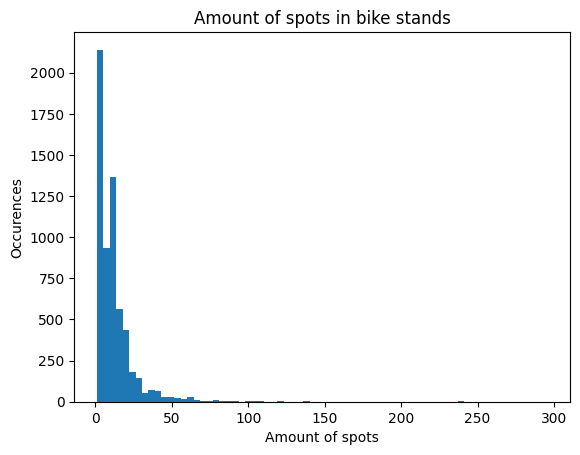

In [27]:
print("Mean: ", np.mean(df["antal_pladser"]))
print("Minimum: ", np.min(df["antal_pladser"]))
print("Maximum: ", np.max(df["antal_pladser"]))

plt.hist(df["antal_pladser"], bins=70)
plt.xlabel("Amount of spots")
plt.ylabel("Occurences")
plt.title("Amount of spots in bike stands")
plt.show()

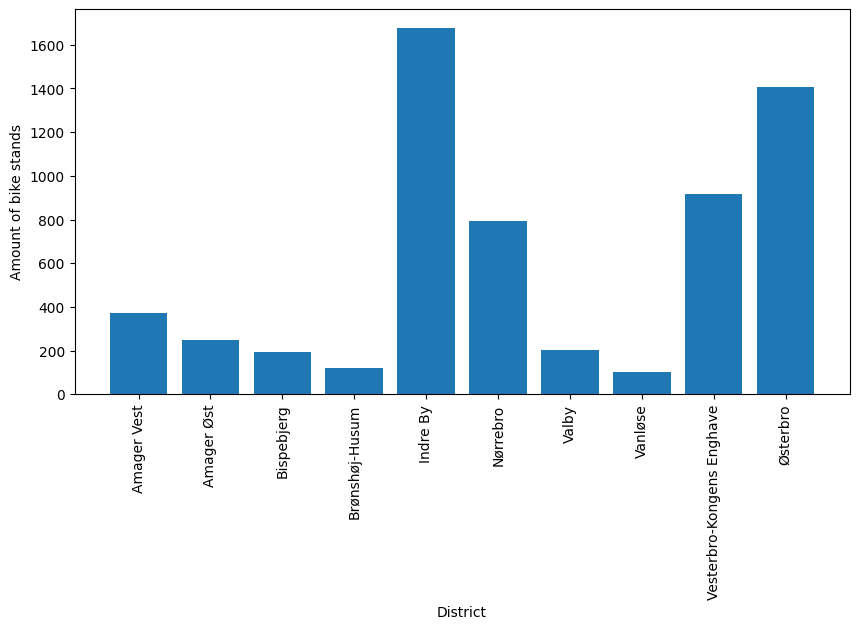

In [38]:
dist_amount = df.groupby("bydel", observed=False).size()
# print(dist_amount)

fig = plt.figure(figsize = (10, 5))
plt.bar(dist_amount.index, dist_amount.values)
plt.xlabel("District")
plt.ylabel("Amount of bike stands")
plt.xticks(ticks=range(len(dist_amount.index)), labels=dist_amount.index, rotation=90)
plt.show()

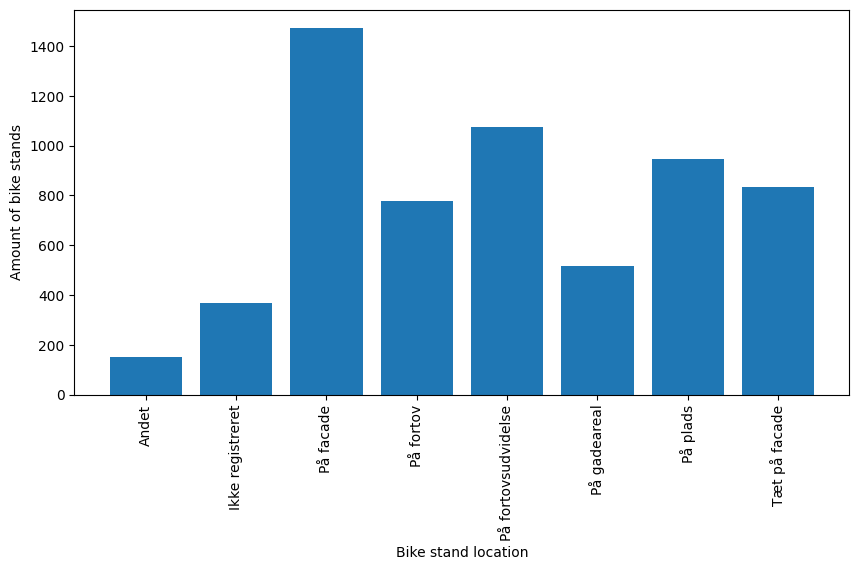

In [40]:
place_amount = df.groupby("stativ_placering", observed=False).size()
# print(place_amount)

fig = plt.figure(figsize = (10, 5))
plt.bar(place_amount.index, place_amount.values)
plt.xlabel("Bike stand location")
plt.ylabel("Amount of bike stands")
plt.xticks(ticks=range(len(place_amount.index)), labels=place_amount.index, rotation=90)
plt.show()

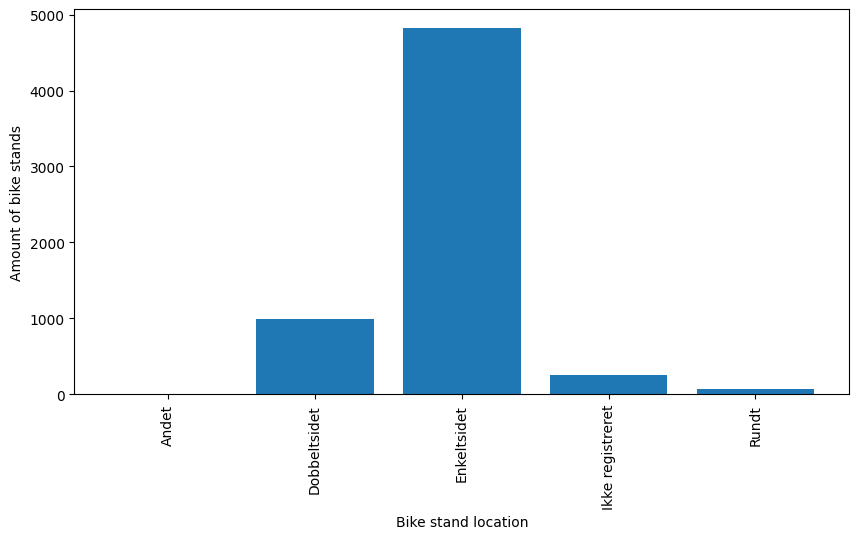

In [41]:
stand_design = df.groupby("stativ_udformning", observed=False).size()
# print(year)

fig = plt.figure(figsize = (10, 5))
plt.bar(stand_design.index, stand_design.values)
plt.xlabel("Bike stand design")
plt.ylabel("Amount of bike stands")
plt.xticks(ticks=range(len(stand_design.index)), labels=stand_design.index, rotation=90)
plt.show()